In [13]:
import numpy as np
import matplotlib as mp 
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_excel (r'D:\Universitas Indonesia\Semester 6\Pemodelan dan Pembelajaran Mesin\Dataset.xlsx')
# print(df)
data = df.iloc[:, 0:8]
label = df.iloc[:, 8:]
data = data.to_numpy()
label = label.to_numpy()
# np.transpose(data)
print(data)
# print(data[0].shape)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [15]:
def normalize(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = ((X-mu)/std_filled)
    return Xbar, mu, std

def eig(S):
    eigvals, eigvecs = np.linalg.eig(S)
    k = np.argsort(eigvals)[::-1]
    return eigvals[k], eigvecs[:,k]

def projection_matrix(B):
    return (B @ np.linalg.inv(B.T @ B) @ B.T)

def PCA(X, num_components):
    S = 1.0/len(X) * np.dot(X.T, X)
    eig_vals, eig_vecs = eig(S)
    eig_vals, eig_vecs = eig_vals[:num_components], eig_vecs[:, :num_components]
    B = np.real(eig_vecs)
    reconst = (projection_matrix(B) @ X.T)
    return reconst.T

In [19]:
## Data Preprocessing
NUM_DATAPOINTS = 1000
X = (data.reshape(-1, 8)[:NUM_DATAPOINTS]) / 255.
Xbar, mu, std = normalize(X)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277 -0.24717971
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.24802194
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546 -0.24704239
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.24834541
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.24802805
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.2481318
  -0.87137393]]


In [17]:
## PCA Implementation
for num_component in range(1, 9):
    from sklearn.decomposition import PCA as SKPCA
    pca = SKPCA(n_components=num_component, svd_solver='full')
    sklearn_reconst = pca.inverse_transform(pca.fit_transform(Xbar))
    reconst = PCA(Xbar, num_component)
    np.testing.assert_almost_equal(reconst, sklearn_reconst)
    dpp = np.square(reconst - sklearn_reconst).sum()
    print(np.square(reconst - sklearn_reconst).sum())

2.7028107587703266e-27
2.5992631566551368e-27
3.085990461166612e-25
1.1851959335323226e-26
1.6772721712430304e-26
9.325663896904382e-27
8.018435844648367e-27
3.936418906299718e-27


In [25]:
def mse(predict, actual):
    """Helper function for computing the mean squared error (MSE)"""
    return np.square(predict - actual).sum(axis=1).mean()

In [26]:
loss = []
reconstructions = []
for num_component in range(1, 10):
    reconst = PCA(Xbar, num_component)
    error = mse(reconst, Xbar)
    reconstructions.append(reconst)
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std + mu 
loss = np.asarray(loss)

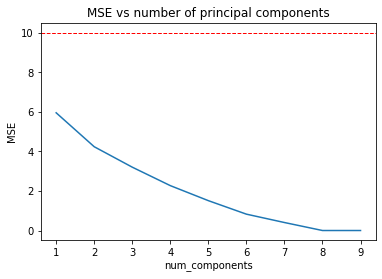

In [30]:
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1]);
ax.axhline(10, linestyle='--', color='r', linewidth=1)
ax.xaxis.set_ticks(np.arange(1, 10, 1))
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');